## Emergency Department Surveilance Analysis Report ##

In [105]:
#import the packages that will be used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [106]:
#import csv file into pandas dataframe
ED = pd.read_csv(r'C:\Users\lost4daze\Documents\UCD\Python Scripts\sampledata1.csv')
display(ED.head())

,Chart,Unnamed: 1,Gender,Unnamed: 3,DoB,Age,Insurance,Unnamed: 7,Day,Arrived DateTime,...,LOS (hh:mm),LOS (minutes),Unnamed: 39,ExitDiagnosis,Unnamed: 41,Admitted Date Time,Unnamed: 43,AdmittedTo,Unnamed: 45,PatientGroup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31487.0,NaN,Female,NaN,18/03/1952,69.0,None,NaN,Mon,23/08/2021 00:00,...,12:55,775.0,NaN,No Exit Diagnosis,NaN,23/08/2021 12:55,NaN,Pre Discharge Unit,NaN,Vomiting
2,84548.0,NaN,Female,NaN,25/09/1996,24.0,NaN,NaN,Mon,23/08/2021 01:29,...,05:01,301.0,NaN,No Exit Diagnosis,NaN,NaN,NaN,NaN,NaN,Swelling
3,234873.0,NaN,Female,NaN,10/06/1998,23.0,Irish Life,NaN,Mon,23/08/2021 01:40,...,04:20,260.0,NaN,No Exit Diagnosis,NaN,NaN,NaN,NaN,NaN,Query Coronavirus
4,49040.0,NaN,Female,NaN,31/01/1972,49.0,NaN,NaN,Mon,23/08/2021 02:26,...,00:49,49.0,NaN,No Exit Diagnosis,NaN,NaN,NaN,NaN,NaN,Assault


In [81]:
ED.dropna(how = 'all', axis = 1, inplace = True) # remove blank columns
print(ED.isna().sum()) # checking missing values in the set
ED.dropna(how = 'all', inplace = True) # remove blank rows
ED.drop('ExitDiagnosis', axis = 1, inplace = True) # Dropping column with no useful data.
print(ED.shape) # checking shape of set

Chart                       9
Gender                      9
DoB                         9
Age                         9
Insurance                  76
Day                         9
Arrived DateTime            9
Previous AE Attendance    143
Attendance Type             9
Transport                   9
Referral Source             9
PresentedWith              11
Referred To                 9
Triage DateTime            11
Arrival to Triage Time      9
Triage                     11
Triage End DateTime        11
Seen DateTime             121
Arrival to Seen Time      121
Lodged DateTime           574
Outcome                     9
ED Depart DateTime         10
LOS (hh:mm)                 9
LOS (minutes)               9
ExitDiagnosis              36
Admitted Date Time        506
AdmittedTo                506
PatientGroup                9
dtype: int64
(677, 27)


In [91]:
# replacing nan values 
print(ED.head())
ED['Insurance'].fillna( 'None', inplace = True)

      Chart  Gender         DoB   Age   Insurance  Day    Arrived DateTime  \
1   31487.0  Female  18/03/1952  69.0        None  Mon 2021-08-23 00:00:00   
2   84548.0  Female  25/09/1996  24.0        None  Mon 2021-08-23 01:29:00   
3  234873.0  Female  10/06/1998  23.0  Irish Life  Mon 2021-08-23 01:40:00   
4   49040.0  Female  31/01/1972  49.0        None  Mon 2021-08-23 02:26:00   
5   64593.0    Male  17/09/2002  18.0        None  Mon 2021-08-23 03:59:00   

  Previous AE Attendance Attendance Type            Transport  ...  \
1     02/06/2021  12:28   New Attendance            Ambulance  ...   
2                    NaN  New Attendance          Private Own  ...   
3                    NaN  New Attendance  Private Accompanied  ...   
4     09/11/2013  16:27   New Attendance            Ambulance  ...   
5     17/11/2020  11:01   New Attendance  Private Accompanied  ...   

        Seen DateTime Arrival to Seen Time Lodged DateTime          Outcome  \
1 2021-08-23 01:52:00          

In [82]:
ED.dtypes

Chart                     float64
Gender                     object
DoB                        object
Age                       float64
Insurance                  object
Day                        object
Arrived DateTime           object
Previous AE Attendance     object
Attendance Type            object
Transport                  object
Referral Source            object
PresentedWith              object
Referred To                object
Triage DateTime            object
Arrival to Triage Time     object
Triage                     object
Triage End DateTime        object
Seen DateTime              object
Arrival to Seen Time       object
Lodged DateTime            object
Outcome                    object
ED Depart DateTime         object
LOS (hh:mm)                object
LOS (minutes)             float64
Admitted Date Time         object
AdmittedTo                 object
PatientGroup               object
dtype: object

In [83]:
#Converting date columns from object to datetime format.
ED[['Arrived DateTime','Triage DateTime','Seen DateTime']] = ED[['Arrived DateTime','Triage DateTime','Seen DateTime']].apply(pd.to_datetime)
ED[['Admitted Date Time','ED Depart DateTime','Lodged DateTime']]=ED[['Admitted Date Time','ED Depart DateTime','Lodged DateTime']].apply(pd.to_datetime)
ED.dtypes

Chart                            float64
Gender                            object
DoB                               object
Age                              float64
Insurance                         object
Day                               object
Arrived DateTime          datetime64[ns]
Previous AE Attendance            object
Attendance Type                   object
Transport                         object
Referral Source                   object
PresentedWith                     object
Referred To                       object
Triage DateTime           datetime64[ns]
Arrival to Triage Time            object
Triage                            object
Triage End DateTime               object
Seen DateTime             datetime64[ns]
Arrival to Seen Time              object
Lodged DateTime           datetime64[ns]
Outcome                           object
ED Depart DateTime        datetime64[ns]
LOS (hh:mm)                       object
LOS (minutes)                    float64
Admitted Date Ti

In [95]:
# Get the average length of stay

ED['lenstay'] = ED['ED Depart DateTime']-ED['Arrived DateTime']
print("The Average length of stay this week was ", ED['lenstay'].mean())

The Average length of stay this week was  0 days 07:26:38.165680473


In [97]:
# group data to find which day has the most attendances

daygroup = ED[['Day', 'Chart']]
daygroup = daygroup.groupby('Day').count()
print(daygroup)

     Chart
Day       
Fri    113
Mon    114
Sat     67
Sun     86
Thu     92
Tue    106
Wed     99


In [93]:
# For loop to get the number of presentataions by Ambulance

count = 0
for i in ED['Transport']:
    if (i == 'Ambulance'):
        count +=1
print(count, ' presentations by ambulance')
print('This equates to', count / len('Chart'), 'percent of all attendances')

144  presentations by ambulance
This equates to 28.8 percent of all attendances


In [98]:
#function to find the mean, median, min and max of wait times in the department

arrtotri = ED['Triage DateTime'] - ED['Arrived DateTime']
arrtosee = ED['Seen DateTime'] - ED['Arrived DateTime']
arrtolod = ED['Lodged DateTime'] - ED['Arrived DateTime']
arrtoadm = ED['Admitted Date Time'] - ED['Arrived DateTime']

def dtimestats(value):
    """ This function returns the mean, median
        min, and max, of a variable"""
        
    print("The mean is " + str(value.mean()))
    print("The median is " + str(value.median()))
    print("The min is " + str(value.min()))
    print("The max is " + str(value.max()))
    print("")        
    
  
dtimestats(arrtotri)
dtimestats(arrtosee)
dtimestats(arrtolod)
dtimestats(arrtoadm)

The mean is 0 days 00:28:16.977777777
The median is 0 days 00:24:00
The min is 0 days 00:01:00
The max is 0 days 03:12:00

The mean is 0 days 03:01:28.778761061
The median is 0 days 02:01:00
The min is -1 days +17:32:00
The max is 0 days 12:59:00

The mean is 0 days 09:34:41.250000
The median is 0 days 09:50:30
The min is 0 days 02:46:00
The max is 1 days 03:04:00

The mean is 0 days 10:55:22.666666666
The median is 0 days 10:36:30
The min is 0 days 00:13:00
The max is 0 days 23:58:00



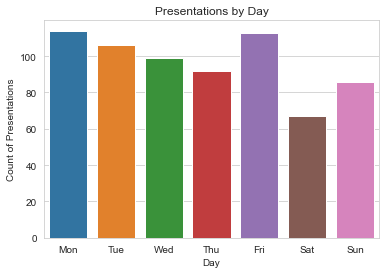

In [100]:
# View attendances to department by day.
ED['Day'].value_counts()
sns.set_style("whitegrid")
g = sns.countplot(x = 'Day', data = ED)
plt.title("Presentations by Day") 
plt.ylabel("Count of Presentations")
plt.xlabel("Day")
plt.show()

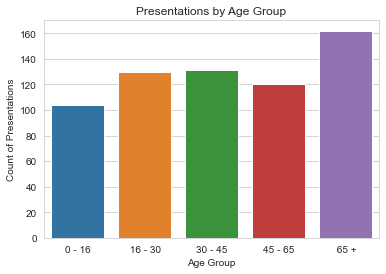

In [101]:
#presentation by age
age_dem = pd.cut(ED['Age'], bins = [0, 16, 30, 45 ,65, np.inf])
Age_range = ['0 - 16' , ' 16 - 30', '30 - 45', '45 - 65', ' 65 +' ]
ED.groupby(age_dem).count()
sns.set_style("whitegrid")
g = sns.countplot( x = age_dem, data = ED)
g.set_xticklabels(Age_range)
plt.title("Presentations by Age Group") 
plt.ylabel("Count of Presentations")
plt.xlabel("Age Group")
plt.show()

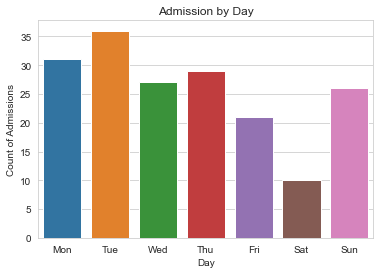

In [102]:
ED['Outcome'].value_counts()
Admitted = ED[ED['Outcome'].isin(['Admit to Ward'])]
#print(admitted)
sns.set_style("whitegrid")
g = sns.countplot(x = 'Day', data = Admitted)
plt.title("Admission by Day") 
plt.ylabel("Count of Admissions")
plt.xlabel("Day")
plt.show()

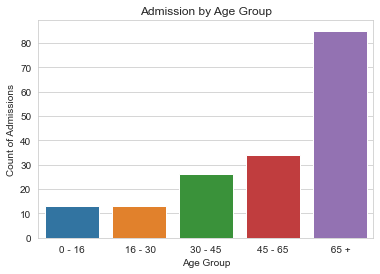

In [103]:
age_dem = pd.cut(Admitted['Age'], bins = [0, 16, 30, 45 ,65, np.inf])
Age_range = ['0 - 16' , ' 16 - 30', '30 - 45', '45 - 65', ' 65 +' ]
Admitted.groupby(age_dem).count()
sns.set_style("whitegrid")
g = sns.countplot( x = age_dem, data = Admitted)
g.set_xticklabels(Age_range)
plt.title("Admission by Age Group") 
plt.ylabel("Count of Admissions")
plt.xlabel("Age Group")
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


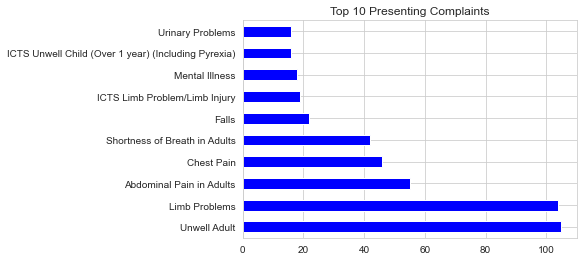

In [104]:
#10 presenting complaints
top10presentcomplaints = ED['PresentedWith'].value_counts()[:10].plot(kind='barh', colormap = 'winter', title = 'Top 10 Presenting Complaints')
print(top10presentcomplaints)